In [ ]:
!pip install tensorflow==2.9.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.1.21
    Uninstalling flatbuffers-23.1.21:
      Successfully uninstalled flatbuffers-23.1.21
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully u

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2023-02-17 19:58:02--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 108.177.12.128, 74.125.134.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   198MB/s    in 0.3s    

2023-02-17 19:58:02 (198 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
! unzip "/content/gdrive/MyDrive/Deep Learning/DogVsCat.zip"

Streaming output truncated to the last 5000 lines.
  inflating: DogVsCat/train/dogs/dog.4382.jpg  
  inflating: DogVsCat/train/dogs/dog.4385.jpg  
  inflating: DogVsCat/train/dogs/dog.4386.jpg  
  inflating: DogVsCat/train/dogs/dog.4388.jpg  
  inflating: DogVsCat/train/dogs/dog.4389.jpg  
  inflating: DogVsCat/train/dogs/dog.4391.jpg  
  inflating: DogVsCat/train/dogs/dog.4392.jpg  
  inflating: DogVsCat/train/dogs/dog.4393.jpg  
  inflating: DogVsCat/train/dogs/dog.4394.jpg  
  inflating: DogVsCat/train/dogs/dog.4395.jpg  
  inflating: DogVsCat/train/dogs/dog.4397.jpg  
  inflating: DogVsCat/train/dogs/dog.4398.jpg  
  inflating: DogVsCat/train/dogs/dog.4399.jpg  
  inflating: DogVsCat/train/dogs/dog.44.jpg  
  inflating: DogVsCat/train/dogs/dog.440.jpg  
  inflating: DogVsCat/train/dogs/dog.4400.jpg  
  inflating: DogVsCat/train/dogs/dog.4401.jpg  
  inflating: DogVsCat/train/dogs/dog.4402.jpg  
  inflating: DogVsCat/train/dogs/dog.4403.jpg  
  inflating: DogVsCat/train/dogs/dog.440

In [ ]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
from google.colab.patches import cv2_imshow

In [ ]:
train_path="/content/DogVsCat/train"
test_path="/content/DogVsCat/test"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [ ]:
print(class_names)
print(class_names_test)

['dogs', 'cats']
['dogs', 'cats']


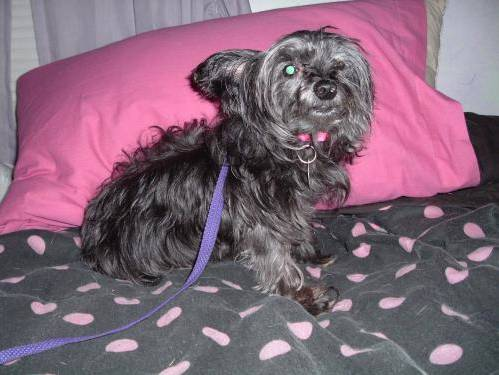

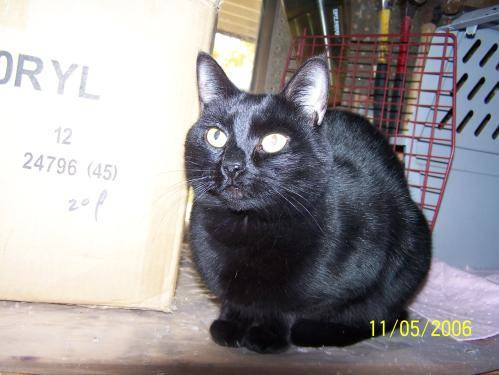

In [ ]:
#Sample datasets images
image_dog=cv2.imread("/content/DogVsCat/test/dogs/dog.0.jpg")
cv2_imshow(image_dog)
image_cat=cv2.imread("/content/DogVsCat/test/cats/cat.10003.jpg")
cv2_imshow(image_cat)

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow_from_directory("/content/DogVsCat/train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory("/content/DogVsCat/test",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
def VGG16():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(Dense(128, activation='relu', name='fc2'))
    model.add(Dense(1, activation='sigmoid', name='output'))
    return model

In [ ]:
model=VGG16()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
Vgg16 = Model(inputs=model.input, outputs=model.get_layer('vgg16').output)

In [ ]:
Vgg16.load_weights("/content/gdrive/MyDrive/Deep Learning/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [ ]:
for layer in Vgg16.layers:
    layer.trainable = False

In [ ]:
for layer in model.layers:
    print(layer.name, layer.trainable)

conv2d False
conv2d_1 False
max_pooling2d False
conv2d_2 False
conv2d_3 False
max_pooling2d_1 False
conv2d_4 False
conv2d_5 False
conv2d_6 False
max_pooling2d_2 False
conv2d_7 False
conv2d_8 False
conv2d_9 False
max_pooling2d_3 False
conv2d_10 False
conv2d_11 False
conv2d_12 False
vgg16 False
flatten True
fc1 True
fc2 True
output True


In [ ]:
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [ ]:
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [ ]:
H = model.fit_generator(train_generator,validation_data=test_generator,epochs=100,verbose=1,callbacks=[mc,es])

<ipython-input-24-0904d4223555>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(train_generator,validation_data=test_generator,epochs=100,verbose=1,callbacks=[mc,es])


Epoch 1/100
625/625 [==============================] - 345s 535ms/step - loss: 0.3045 - accuracy: 0.9255 - val_loss: 0.1372 - val_accuracy: 0.9616
Epoch 2/100
625/625 [==============================] - 326s 522ms/step - loss: 0.1483 - accuracy: 0.9506 - val_loss: 0.1265 - val_accuracy: 0.9604
Epoch 3/100
625/625 [==============================] - 328s 525ms/step - loss: 0.1225 - accuracy: 0.9574 - val_loss: 0.1022 - val_accuracy: 0.9662
Epoch 4/100
625/625 [==============================] - 328s 524ms/step - loss: 0.0968 - accuracy: 0.9643 - val_loss: 0.0959 - val_accuracy: 0.9686
Epoch 5/100
625/625 [==============================] - 325s 519ms/step - loss: 0.0872 - accuracy: 0.9671 - val_loss: 0.0966 - val_accuracy: 0.9688
Epoch 6/100
625/625 [==============================] - 324s 519ms/step - loss: 0.0806 - accuracy: 0.9695 - val_loss: 0.1044 - val_accuracy: 0.9674
Epoch 7/100
625/625 [==============================] - 328s 524ms/step - loss: 0.0768 - accuracy: 0.9710 - val_loss: 0

In [ ]:
model.load_weights("/content/gdrive/MyDrive/best_model.h5")

In [ ]:
model.evaluate_generator(test_generator)

<ipython-input-26-faa0e9406f88>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator)


[0.0868198573589325, 0.9746000170707703]

In [ ]:
model_json = model.to_json()

In [ ]:
with open("/content/gdrive/MyDrive/Deep Learning/model.json","w") as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import model_from_json

In [ ]:
def predict_(image_path):
    #Load the Model from Json File
    json_file = open('/content/gdrive/MyDrive/Deep Learning/model.json', 'r')
    model_json_c = json_file.read()
    json_file.close()
    model_c = model_from_json(model_json_c)
    #Load the weights
    model_c.load_weights("/content/gdrive/MyDrive/best_model.h5")
    #Compile the model
    opt = SGD(lr=1e-4, momentum=0.9)
    model_c.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    #load the image you want to classify
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224,224))
    cv2_imshow(image)
    #predict the image
    preds = model_c.predict(np.expand_dims(image, axis=0))[0]
    if preds==0:
        print("Predicted Label:Cat")
    else:
        print("Predicted Label: Dog")

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


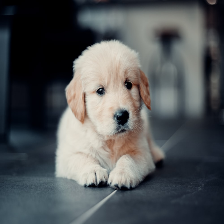

1/1 [==============================] - 1s 900ms/step
Predicted Label: Dog


In [ ]:
predict_("/content/dog.jpg")

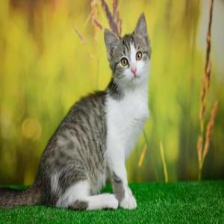

1/1 [==============================] - 0s 204ms/step
Predicted Label: Dog


In [ ]:
predict_("/content/cat.jpg")

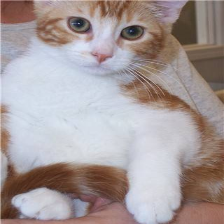

1/1 [==============================] - 1s 641ms/step
Predicted Label: Dog


In [ ]:
predict_("/content/cat.9.jpg")